<a href="https://colab.research.google.com/github/abuy69/abuy69/blob/main/Apple_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
def download_stock_data(ticker, start, end):
    return yf.download(ticker, start=start, end=end)

# Example: Download data for 2022
data_2022 = download_stock_data('AAPL', '2024-07-01', '2024-07-31')


[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Download stock data for Apple
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Preview the data
print(data.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876114  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167603  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742653  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400551  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565201  132079200


Moving Average Convergence Divergence

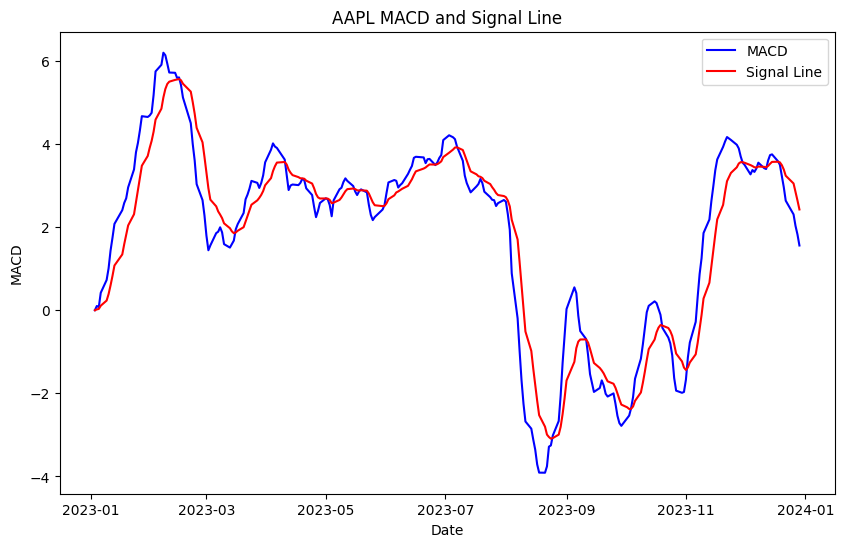

In [ ]:
# Calculate MACD and Signal Line
data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Plotting MACD and Signal Line
plt.figure(figsize=(10, 6))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['Signal'], label='Signal Line', color='red')
plt.title('AAPL MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()


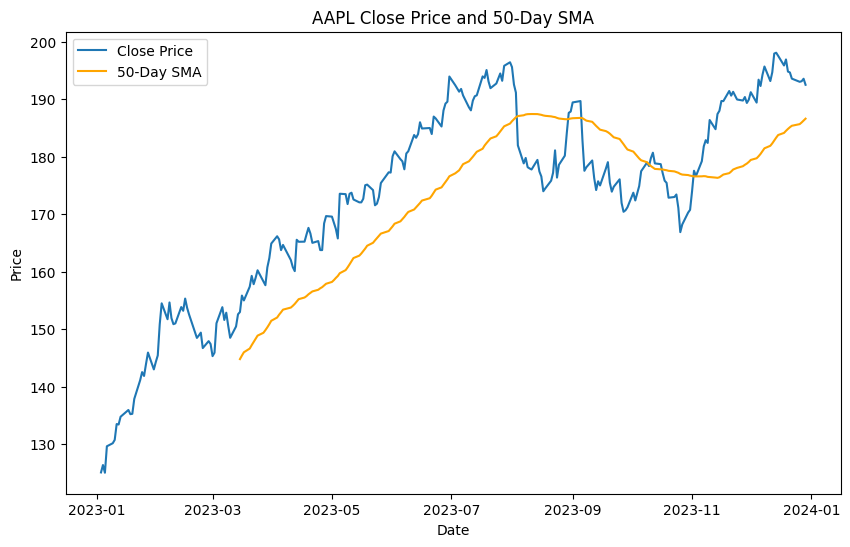

In [ ]:
# Calculate 50-day SMA
data['SMA50'] = data['Close'].rolling(window=50).mean()

# Plotting the closing price and SMA
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA50'], label='50-Day SMA', color='orange')
plt.title('AAPL Close Price and 50-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


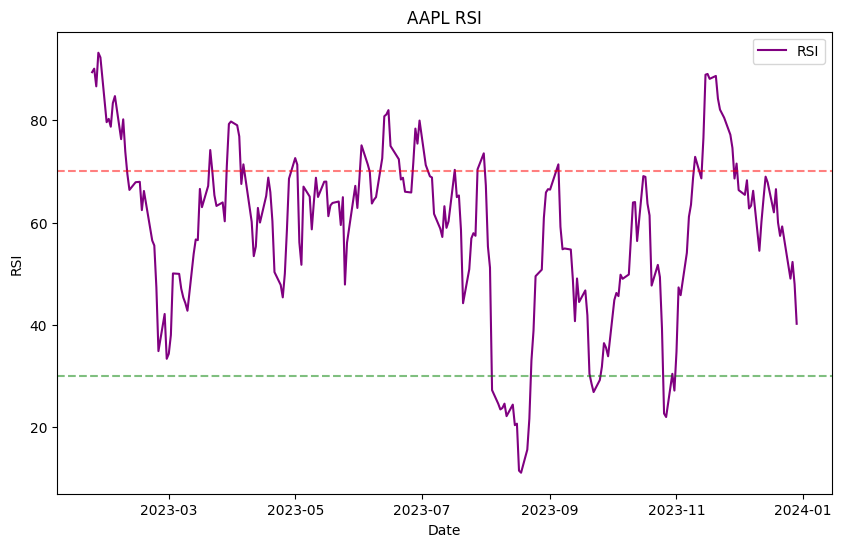

In [ ]:
# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Plotting RSI
plt.figure(figsize=(10, 6))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('AAPL RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


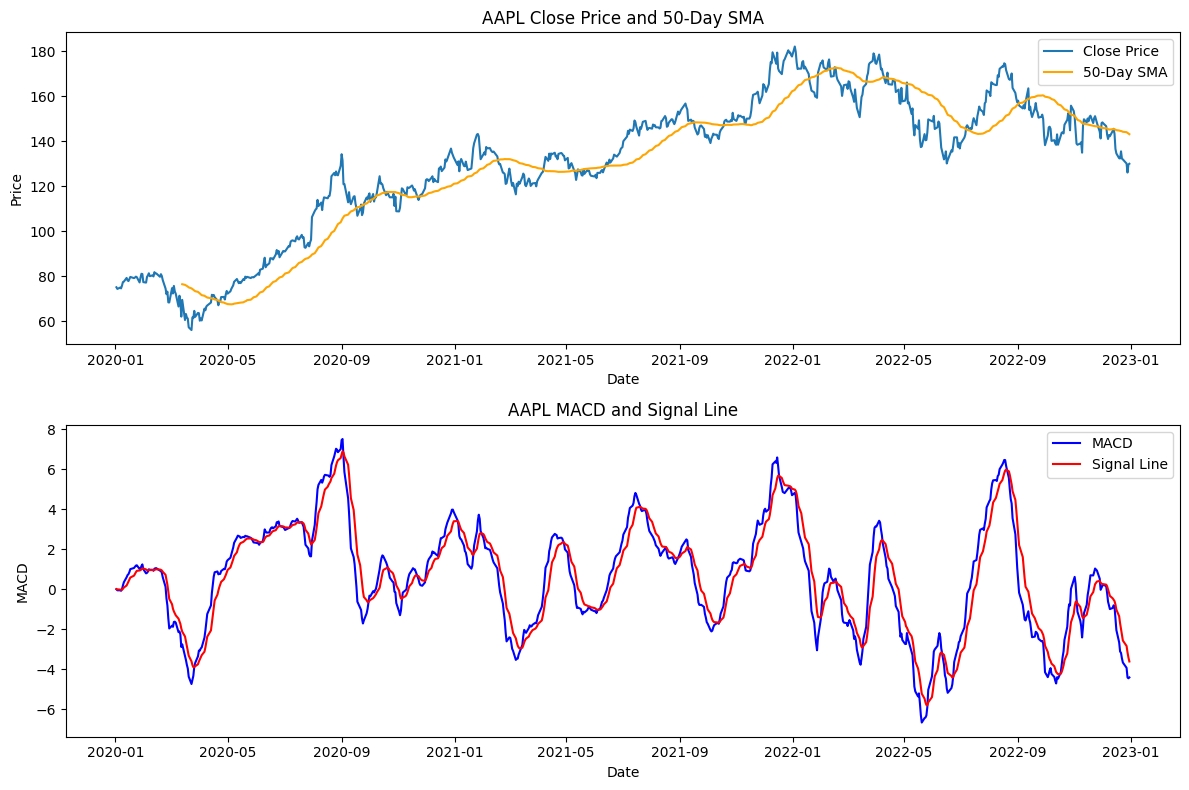

In [ ]:
# Plot closing price with SMA and MACD
plt.figure(figsize=(12, 8))

# Subplot 1: Close Price and SMA
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA50'], label='50-Day SMA', color='orange')
plt.title('AAPL Close Price and 50-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Subplot 2: MACD and Signal Line
plt.subplot(2, 1, 2)
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['Signal'], label='Signal Line', color='red')
plt.title('AAPL MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Download stock data for Apple
ticker = 'AAPL'
data = yf.download(ticker, start='2023-01-01', end='2024-01-01')

# Preview the data
print(data.head())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904625   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855103   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412231   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


In [ ]:
# Downloading financial statements using yfinance
apple = yf.Ticker(ticker)

# Income Statement
income_statement = apple.financials
income_statement = income_statement.T

income_statement.to_csv('income_statement.csv', index=False, float_format='%.2f')

print(income_statement)
# Balance Sheet
balance_sheet = apple.balance_sheet
print(balance_sheet)

# Cash Flow Statement
cash_flow = apple.cashflow
print(cash_flow)

# Example: Calculate P/E ratio
pe_ratio = apple.info['trailingPE']
print(f"P/E Ratio: {pe_ratio}")


           Tax Effect Of Unusual Items Tax Rate For Calcs Normalized EBITDA  \
2023-09-30                         0.0              0.147    129188000000.0   
2022-09-30                         0.0              0.162    133138000000.0   
2021-09-30                         0.0              0.133    123136000000.0   
2020-09-30                         0.0              0.144     81020000000.0   

           Net Income From Continuing Operation Net Minority Interest  \
2023-09-30                                      96995000000.0           
2022-09-30                                      99803000000.0           
2021-09-30                                      94680000000.0           
2020-09-30                                      57411000000.0           

           Reconciled Depreciation Reconciled Cost Of Revenue          EBITDA  \
2023-09-30           11519000000.0             214137000000.0  129188000000.0   
2022-09-30           11104000000.0             223546000000.0  133138000000.

In [ ]:
# Example data (based on provided values)
gross_profit = 169148000000.0
total_revenue = 383285000000.0
operating_income = 114301000000.0
net_income = 96995000000.0

print(f"AAPL")
# Gross Profit Margin
gross_profit_margin = (gross_profit / total_revenue) * 100
print(f"Gross Profit Margin: {gross_profit_margin:.2f}%")

# Operating Profit Margin
operating_profit_margin = (operating_income / total_revenue) * 100
print(f"Operating Profit Margin: {operating_profit_margin:.2f}%")

# Net Profit Margin
net_profit_margin = (net_income / total_revenue) * 100
print(f"Net Profit Margin: {net_profit_margin:.2f}%")


AAPL
Gross Profit Margin: 44.13%
Operating Profit Margin: 29.82%
Net Profit Margin: 25.31%
